# Importing libraries


In [4]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
from keras.callbacks import EarlyStopping

# Tesla RNN Model

Link: https://towardsdatascience.com/lstm-time-series-forecasting-predicting-stock-prices-using-an-lstm-model-6223e9644a2f

In [3]:
# import yfinance as yf

In [2]:
# df=yf.download('TSLA', start='2015-07-10', end='2020-07-10')

[*********************100%***********************]  1 of 1 completed


In [ ]:
df=df.reset_index()
df.head()

In [13]:
# df.to_csv('tesla.csv', index=False)
df= pd.read_csv('tesla.csv')

In [14]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-07-09,51.816002,52.590000,51.358002,51.584000,51.584000,16670500
1,2015-07-10,52.444000,52.599998,51.563999,51.830002,51.830002,13054500
2,2015-07-13,52.450001,52.509998,51.209999,52.431999,52.431999,14801500
3,2015-07-14,52.419998,53.198002,52.102001,53.130001,53.130001,9538000
4,2015-07-15,53.348000,53.498001,52.416000,52.627998,52.627998,10108000
...,...,...,...,...,...,...,...
1255,2020-07-02,244.296005,245.600006,237.119995,241.731995,241.731995,86250500
1256,2020-07-06,255.337997,275.558014,253.207993,274.316010,274.316010,102849500
1257,2020-07-07,281.002014,285.899994,267.342010,277.971985,277.971985,107448500
1258,2020-07-08,281.000000,283.451996,262.268005,273.175995,273.175995,81556500


In [15]:
training_set = df.iloc[:800,4:5].values
test_set=df.iloc[800:,4:5].values

In [16]:
training_set

array([[51.58399963],
       [51.83000183],
       [52.43199921],
       [53.13000107],
       [52.62799835],
       [53.33599854],
       [54.93199921],
       [56.45199966],
       [53.35400009],
       [53.57400131],
       [53.43999863],
       [53.08200073],
       [50.60200119],
       [52.9640007 ],
       [52.76399994],
       [53.35800171],
       [53.22999954],
       [51.9980011 ],
       [53.25600052],
       [54.02600098],
       [49.22600174],
       [48.5019989 ],
       [48.22800064],
       [47.47399902],
       [47.63399887],
       [48.5019989 ],
       [48.63000107],
       [50.9980011 ],
       [52.14400101],
       [51.04999924],
       [48.43600082],
       [46.15399933],
       [43.77399826],
       [44.00600052],
       [44.9679985 ],
       [48.59799957],
       [49.69599915],
       [49.81200027],
       [47.72600174],
       [49.5379982 ],
       [49.11399841],
       [48.38600159],
       [49.63399887],
       [49.7820015 ],
       [49.69599915],
       [50

In [17]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 800):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#(740, 60, 1)

# Prepare the test data (rehspae them)

In [18]:
model = Sequential()#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
24/24 [==============================] - 13s 110ms/step - loss: 0.1769
Epoch 2/100
24/24 [==============================] - 3s 109ms/step - loss: 0.0219
Epoch 3/100
24/24 [==============================] - 3s 109ms/step - loss: 0.0128
Epoch 4/100
24/24 [==============================] - 3s 112ms/step - loss: 0.0126
Epoch 5/100
24/24 [==============================] - 3s 109ms/step - loss: 0.0120
Epoch 6/100
24/24 [==============================] - 3s 109ms/step - loss: 0.0130
Epoch 7/100
24/24 [==============================] - 3s 113ms/step - loss: 0.0112
Epoch 8/100
24/24 [==============================] - 3s 115ms/step - loss: 0.0113
Epoch 9/100
24/24 [==============================] - 3s 117ms/step - loss: 0.0123
Epoch 10/100
24/24 [==============================] - 3s 114ms/step - loss: 0.0110
Epoch 11/100
24/24 [==============================] - 3s 113ms/step - loss: 0.0104
Epoch 12/100
24/24 [==============================] - 3s 114ms/step - loss: 0.0102
Epoch 13/100

24/24 [==============================] - 3s 130ms/step - loss: 0.0031
Epoch 100/100
24/24 [==============================] - 3s 139ms/step - loss: 0.0031


#### Prepare the test data (reshape them)

In [20]:
# Getting the predicted stock price of 2017
dataset_train = df.iloc[:800, 4:5]
dataset_test = df.iloc[800:, 4:5]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 519):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)
# (459, 60, 1)

(459, 60, 1)


### Make Predictions using the test set

In [21]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

## Lets visuallize the results now

ValueError: x and y must have same first dimension, but have shapes (460,) and (459,)

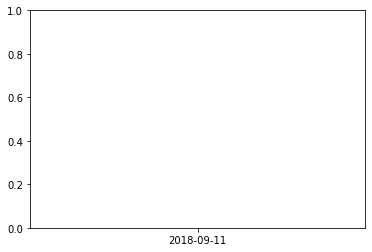

In [28]:
# Visualising the results
plt.plot(date,dataset, color = 'r', label = 'Real TESLA Stock Price')
plt.plot(date,Pred, color = 'b', label = 'Predicted TESLA Stock Price')
plt.xticks(np.arange(0,459,50))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()

In [78]:
predicted_stock_price.shape

(459, 1)

In [79]:
pred=pd.DataFrame(predicted_stock_price, columns=['Pred'])
pred

,Pred
0,57.617073
1,58.133938
2,59.296444
3,60.304176
4,61.140934
...,...
454,126.924263
455,126.198593
456,134.040359
457,138.142395


In [80]:
test=dataset_test.reset_index(drop=True)

In [81]:
test

,Close
0,55.888000
1,58.108002
2,57.891998
3,59.040001
4,58.967999
...,...
455,241.731995
456,274.316010
457,277.971985
458,273.175995


In [82]:
date=df.loc[800:, 'Date']
date=pd.DataFrame(date)
date=date.reset_index(drop=True)

In [83]:
date

,Date
0,2018-09-11
1,2018-09-12
2,2018-09-13
3,2018-09-14
4,2018-09-17
...,...
455,2020-07-02
456,2020-07-06
457,2020-07-07
458,2020-07-08


In [84]:
pr_data=pd.concat([date, test,pred],axis=1)

In [85]:
pr_data

,Date,Close,Pred
0,2018-09-11,55.888000,57.617073
1,2018-09-12,58.108002,58.133938
2,2018-09-13,57.891998,59.296444
3,2018-09-14,59.040001,60.304176
4,2018-09-17,58.967999,61.140934
...,...,...,...
455,2020-07-02,241.731995,126.198593
456,2020-07-06,274.316010,134.040359
457,2020-07-07,277.971985,138.142395
458,2020-07-08,273.175995,131.596832


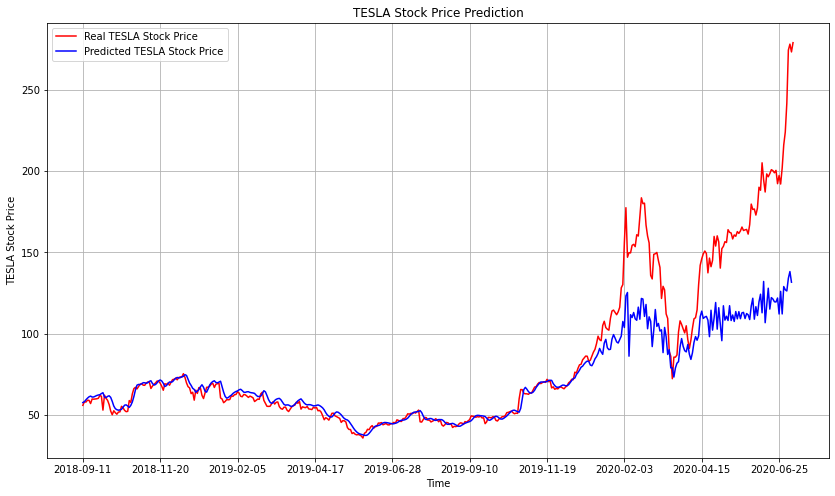

In [88]:
# Visualising the results
plt.figure(figsize=(14,8))
plt.plot(pr_data['Date'],pr_data['Close'],color = 'r', label = 'Real TESLA Stock Price')
plt.plot(pr_data['Date'],pr_data['Pred'], color = 'b', label = 'Predicted TESLA Stock Price')
plt.xticks(np.arange(0,460,50))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.grid()
plt.show()
